# 1. 시계열 그래프

In [1]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family= font_name)

In [2]:
df = pd.read_excel('./files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [3]:
df_filter = df[df['국적']=='중국']
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


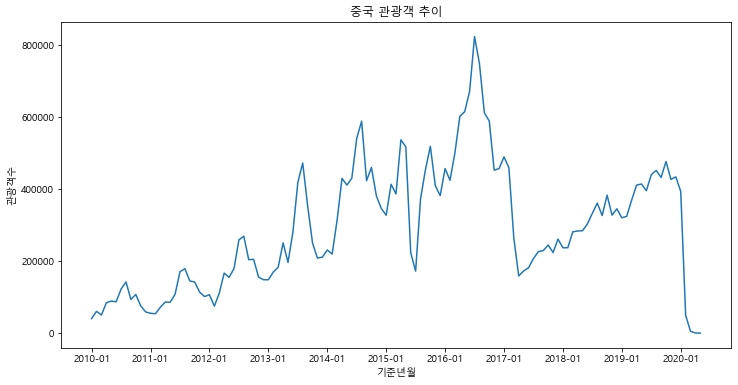

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.title('중국 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.xticks(['20{}-01'.format(x) for x in range(10,21)])
plt.show()

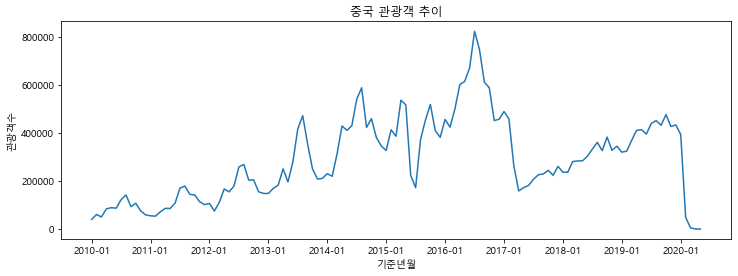

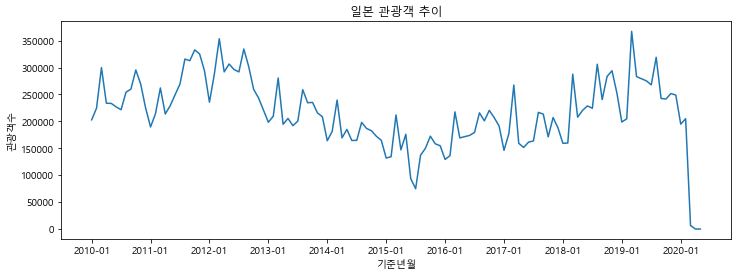

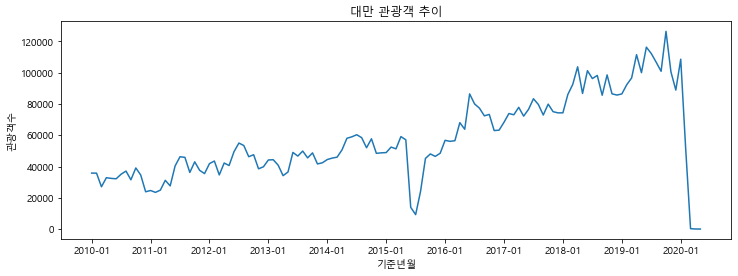

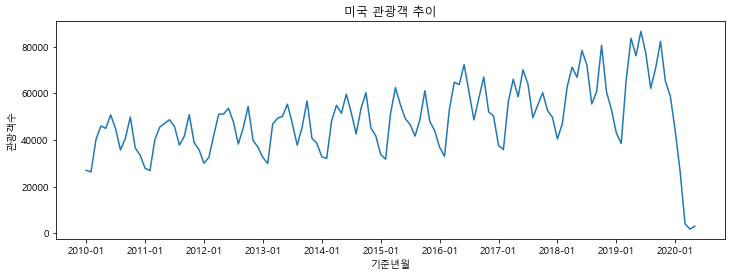

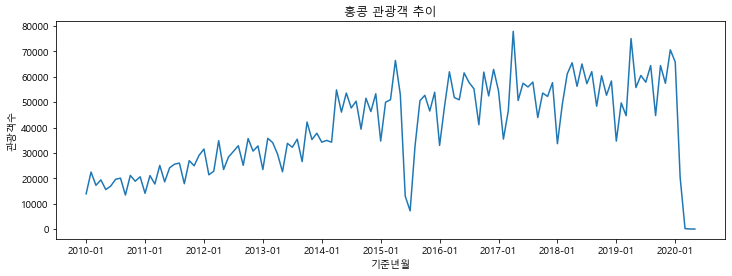

In [5]:
cntry_list = ['중국','일본','대만','미국','홍콩']

for cntry in cntry_list:
    condition = df['국적'] == cntry
    df_filter = df[condition]
    
    plt.figure(figsize=(12,4))
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    plt.title('%s 관광객 추이' %cntry)
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['20{}-01'.format(x) for x in range(10,21)])
    plt.show()

# 2. 히트맵(Heat map)

In [6]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [8]:
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [9]:
condition = df['국적'] == '중국'
df_filter = df[condition]

df_pivot = df_filter.pivot_table(values = '관광', index = '년도', columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


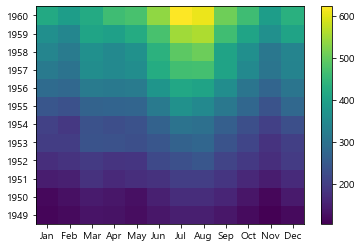

In [18]:
# matplotlib - pcolor
flights = sns.load_dataset('flights')
flights_pivot = flights.pivot_table(values ='passengers', index='year', columns='month')

plt.pcolor(flights_pivot)
plt.xticks(np.arange(0.5, len(flights_pivot.columns)), flights_pivot.columns)
plt.yticks(np.arange(0.5, len(flights_pivot.index)), flights_pivot.index)
plt.colorbar()

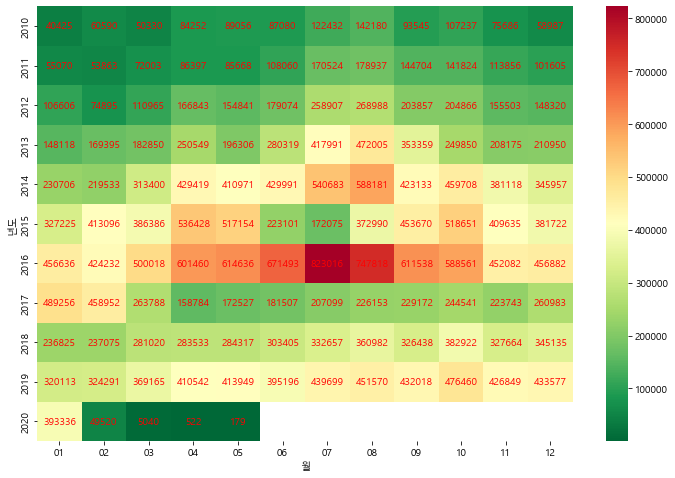

In [25]:
# seaborn - heatmap
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df_pivot,
            annot=True,
            fmt='.0f',
            cmap='RdYlGn_r',
            annot_kws={'size':10, 'color':'red'})
plt.show()

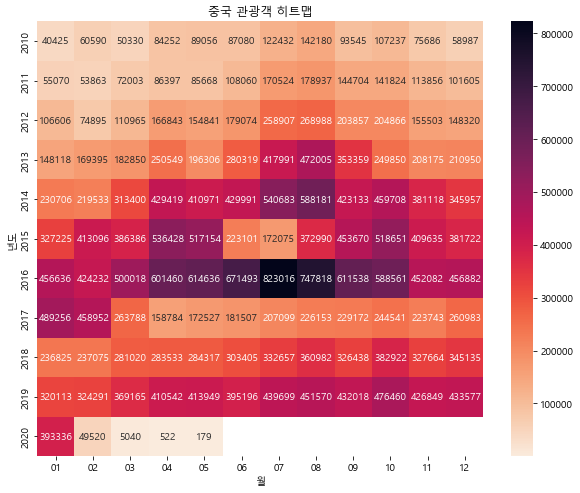

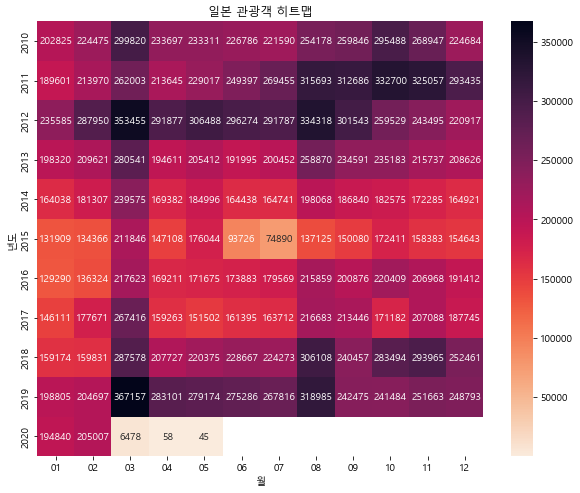

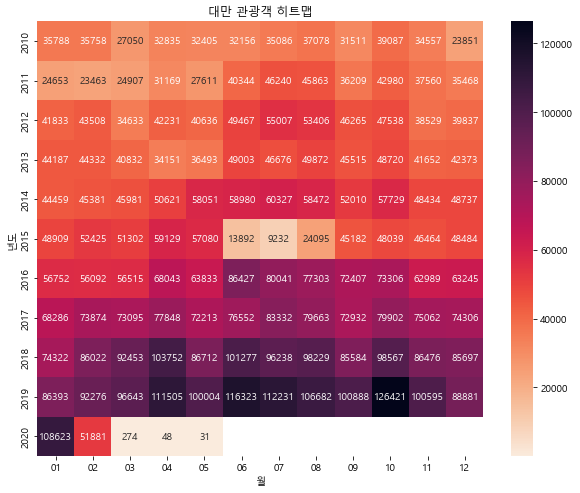

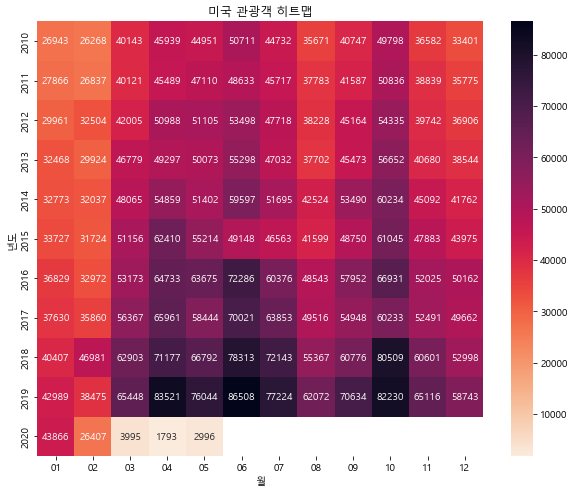

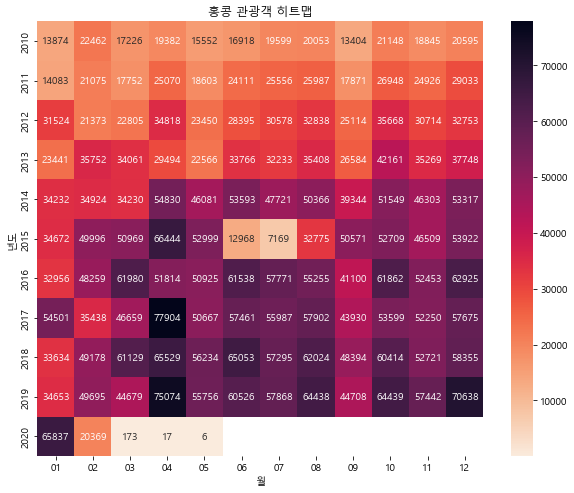

In [27]:
for cntry in cntry_list:
    condition = df['국적'] == cntry
    df_filter = df[condition]
    df_pivot = df_filter.pivot(values='관광', index='년도', columns='월')
    
    plt.figure(figsize=(10,8))
    sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
    plt.title('%s 관광객 히트맵' %cntry)
    plt.show()